# Akademi Education X Flatiron School - Data Science & AI
---

- **Student name :** Vilmarson JULES
- **Student pace :** self pace
- **Deadline Submission :** July 27, 2025 
- **Instructors' Name :** Wedter Jerome & Geovany Batista Polo Laguerre
- **GitHub Repository:** [Movie-Insights Project](https://github.com/VilmarsonJ/ds-2-movie-insights)  
- **LinkedIn:** [Vilmarson JULES](https://www.linkedin.com/in/jules-vilmarson-2a68a5294/)


## Movie-Insights: A Data Science Study of High-Performing Movies at the Box Office

---

![phoyo](Images/boxoffice.jpg)

## Overview  
---  

**The goal of this project is to identify the types of films currently performing best at the box office.**  
I explore and analyze film data with clear visualizations to make insights accessible for stakeholders, and provide three business recommendations to guide decision-making.  

***This project is intended to:***  
- #### Identify and Analyse top-performing films and link findings directly to business needs.  
- #### Highlight key trends and statistical insights about box office performance.  


### Short Description :
---

This project is designed to point out the types of films are currently doing the best at the box office.Throughout this I explore and analyse those films, Plenty of appropriate visualisations are used and three business recomandations concerning the films at the box office are provided to make stakeholders understand the insights of the findings much better.

## Business Problem

---
![photo](Images/image1.jpg)



My campany gets inspired by the way that many companies dive into creating original videos content and wants to experiment this sector.  
Although they do not know anythings about this sector, they have decided to create a new movie studio in order to create or produce  
original video contents.   

Consequently, as a Data scienctist the compagny has charged me to explore :  
**What types of films are currently doing the best at the box office**.  
Then, I must certainlyn used my professional and scientific proficiencies to translate those findings into actionable and strategic insights so that the head of my company's new movie studio can leverage to what type of films to create.

## The Data

---   
The movie datasets used to achieve this project were collected from various locatioon as we see bellow :
* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

From the various location showed above, all of the datasets are files with `csv` format, except for the IMDB which is located in a SQLite DataBase.

This picture bellow, show a global structure of th IMDB DataBase.

![phoyo](Images/Imdb.jpeg)

## Methods
---

To carry out this project, we relied on a set of technical tools and environments, including **Git, GitHub, Git Bash, and Jupyter Notebook**. In addition, we made extensive use of **SQL and Python**, with a focus on the following libraries: `pandas`, `matplotlib`, `seaborn`, `scipy`, `statsmodels`, and `sqlite3`.  

The methodological approach followed two main phases:  

### 1. Descriptive Statistical Analysis
   - **Data Cleaning and Preparation** using `pandas` to ensure data consistency and reliability.  
   - **Exploratory Data Analysis (EDA)** to uncover patterns and trends.  
   - **Data Visualization** with `matplotlib` and `seaborn` to extract salient insights and support interpretation.  
   

### 2. Diagnostic / Inferential Statistical Analysis
   - **Hypothesis Testing and ANOVA** to assess significant differences across genres and studios.  
   - **Correlation Analysis** to measure relationships between numerical variables.  
   - **Statistical Validation** using `scipy` and `statsmodels`.  


## Business Understanding
---

![photo](Images/image0.jpg)



This movie insights aims to support data-driven decision-making for my company which wants to experiment the sector of creating original video content.  
The core objective is to **identify what types of films are currently doing the best at the box office**.  

By understanding patterns in the rankings of best films at the box office, The head of the company's new movie studio can :  
- Identify wich films that seem more profitable for the company to create
- have a business roadmap to follow in order to beguin this meaningful adventure.


In [62]:
# Here I import all necessary libraries to start.
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandasql import sqldf
import numpy as np
import sqlite3
import gzip
import zipfile
import pathlib

## Data Understanding


Here we are going to get a meaningful overview of the Datasets that we actually used to achieve this wonderful work.  
To do so, we are going To get fundamental :

- ### 1. Overview of the IBM Database
- ### 2. Overview of the Csv Datasets

Consequently, I use some of the methods of `Pandas` DataFrame, like `.head()`,`shape`, ` .info()` etc to get overview of each dataset.   
And also I use `SQL` to interrogate my database so that I can get relavent overview of each table it contains.



### 1. Overview of the IBM Database :

---

#### Here I'm going to exokore the IBM database :
1. To determine how many tables it contains
2. To explore the most relevant tables to make stackholders have a fundamental insights of the data.


In [63]:
# import zipfile, pathlib, pandas as pd, sqlite3, gzip

#  Unzip SQLite once (idempotent)
if not pathlib.Path("zippedData/im.db").is_file():
    with zipfile.ZipFile("zippedData/im.db.zip") as z:
        z.extractall("zippedData")

# 2️⃣  and here I Load the compressed flat files into pandas DataFrames
movie_gross  = pd.read_csv("zippedData/bom.movie_gross.csv.gz", compression="gzip")  # # tell pandas to decompress on the fly
tmdb_movie  = pd.read_csv("zippedData/tmdb.movies.csv.gz",    compression="gzip")
movie_info   = pd.read_csv("zippedData/rt.movie_info.tsv.gz",  sep="\t", compression="gzip")
movie_review = pd.read_csv("zippedData/rt.reviews.tsv.gz",     sep="\t",
                       compression="gzip", encoding="latin1", low_memory=False)
movie_budget = pd.read_csv("zippedData/tn.movie_budgets.csv.gz", compression="gzip")

# I Connect to the SQLite DB (im.db) and list its tables
conn   = sqlite3.connect("zippedData/im.db")

As we can see below, the IMBB conrains fives tables. then, I will explore them to see what they contain.

In [64]:
# and here, I list all of the available tables of im.db
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables.head()


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings


In [65]:
# To select all the Data of the tables
q1 = """ SELECT * FROM movie_basics ; """
q2 = """ SELECT * FROM movie_ratings ; """

In [66]:
movie = pd.read_sql(q1, conn) # I store this data in a dataframe called movie
movie.head(10)  # Fetch only he first 10 observations

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [67]:
# Count frequencies of values in movie_id columns
movie[['movie_id']].value_counts()

movie_id 
tt9916754    1
tt2901864    1
tt2902126    1
tt2902032    1
tt2901984    1
            ..
tt5687280    1
tt5687282    1
tt5687328    1
tt5687334    1
tt0063540    1
Length: 146144, dtype: int64

In [68]:
# Dimension of our table
movie.shape

(146144, 6)

In [69]:
ratings = pd.read_sql(q2, conn) # I store this data in a dataframe called ratings
ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


AS we can see the **movie_basics** table represents the core movie info(title, year, genre),  
While the **movie_ratings** represent the average of rate and the number of votes provided by audiances or users. 

Moreover, each row of those two tables **represents informations about a particualr movie.**  
And we can observe that they contains a unique movie in each row identified by the movie_id.  
The table movie contains **146144 observations** about the movies while movie_ratings contains only **73856 observations.**

### As the goal is to find the best movie(films) at the box office, 
bellow I join those two tables in order to relate eeach movie to their respective rate.

And, finally we will see that we have created a dataframe called **movie_rate** that contains informations about both of the tables.  
And I will considere this table as I move on farther.

In [70]:
q_Join = """ SELECT movie_id, primary_title, start_year, runtime_minutes, genres,
            averagerating as rating, numvotes as number_votes
            FROM movie_basics
            JOIN movie_ratings
            USING(movie_id) ; """

movie_rate = pd.read_sql(q_Join, conn) # I store this data in a dataframe called movie_rate

# NOw, I display the movie_rate DataFrame(table)
movie_rate.head(10)

,movie_id,primary_title,start_year,runtime_minutes,genres,rating,number_votes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [71]:
# I count unique movie_id of movie_rate
movie_rate[['movie_id']].value_counts()

movie_id 
tt9916160    1
tt2413182    1
tt2418372    1
tt2418384    1
tt2418440    1
            ..
tt4861720    1
tt4861730    1
tt4862056    1
tt4862190    1
tt0063540    1
Length: 73856, dtype: int64

In [72]:
# THe dimension of my dataframe movie_rate
movie_rate.shape

(73856, 7)

In [73]:
#I look for the duplicate values in the movie_rate
movie_rate.isna().sum()

movie_id              0
primary_title         0
start_year            0
runtime_minutes    7620
genres              804
rating                0
number_votes          0
dtype: int64

In [74]:
#I lookat the frequency of each genre of the movie_rate

movie_rate[['genres']].value_counts()

genres                     
Drama                          11612
Documentary                    10313
Comedy                          5613
Horror                          2692
Comedy,Drama                    2617
                               ...  
Adventure,Animation,History        1
History,Romance,War                1
Comedy,Fantasy,Mystery             1
Comedy,Fantasy,Sport               1
Comedy,Documentary,Western         1
Length: 923, dtype: int64

#### Above, I explotred the IMDB and examine its the tables in order to get fundamental findings of the IMDB.  
---
Although it contains 5 tables, I only considere the tables ***movie_basics and movie_ratings*** that seem the most relevant for the analyses.  
Since the goal is to find the best movie(films) at the box office, I join them and store the result in the table ***movie_rate*** to deeper the analyses.


And now, this is the time to explore the CSV datasets to see how they can be meaningful

### 2. overview of the csv datasets
---

####  As we are going deeper in our Data undestanding, below I explore orther datasets besides tables of IMDB.   
Consequently, so much important fidings are exhibited bellow, so we will notice that :
1. **movie_gross** contains informations about revenus earning the films at the box office, that means this is the main source for box office revenue
2. **movie_budget**  tracks not only box office revenue but also the production budgets of each movie.

#### 1. movie_gross DataFrame

In [75]:
# I display the movie_gross dataFrame
movie_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [76]:
# I look at the studio column
movie_gross.studio

0               BV
1               BV
2               WB
3               WB
4             P/DW
           ...    
3382         Magn.
3383            FM
3384          Sony
3385    Synergetic
3386         Grav.
Name: studio, Length: 3387, dtype: object

In [77]:
# The dimension of the movie_budget
movie_gross.shape

(3387, 5)

In [78]:
# Identify missing values
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [79]:
# Identify duplicates values
movie_gross.duplicated().sum()

0

In [80]:
# Identify duplicates values
movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [81]:
# A brief summary statistics of numerical variables of movie_gross
movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


#### 2. movie_budget DataFrame

In [82]:
# I display the movie_budget
movie_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [83]:
# The dimension of the movie_budget
movie_budget.shape

(5782, 6)

In [84]:
# Identify columns that contains missing values
movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [85]:
# Identify columns that contains duplicate values
movie_budget.duplicated().sum()

0

In [86]:
# Identify the types of each columns(variables) movie_buget
movie_budget.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

#### As we have seen, I explore the tables meticulously to get quick findings from them, we can observe that :
**movie_gross** contains informations about revenus earning by the films, that means this table is the main source for box office revenue.  
Moreover, it shows that the average domestic gross earns by filmsis 2.874585e+07 $.

All of thoses tables shown above are really important for the analyses. So far, we had quick findings of them.  
Howerver, they should be prepared in order to do the most relevant analysis.  
So, in the next step, I will dive into the **Data Preparation** in order to prepare correctly the data for the analysis and results.

## Data Preparation
---
 Here we go !
 Now I'm about to prepare the data for analysis. As I've seen above, all the DataFrames, needs being cleaned. In fact, they contains 
- many columns with missing values
- columns with inapproriate datatypes
- columns with miswritten category, and so on.  

As a result, Through the process of preparing the Data, I'm going to do the :
 
 1. ### Data cleaning
     - #### Deal with columns
     - #### Handle missing values
 2. ### Feature Engineering
 3. ### Merging DataFrames

### 1. Data cleaning


#### Deal with columns properly 

Here we are going to focus on each columns in order to **keep** or to **drop** with the `.Drop()` method

Then, i'm going to :
- #### Drop less useful columns for this analysis
- #### Use appropriate name for each columns
- #### change the data type of columns if necessary

#### Missing values in the movie_gross table

In [87]:

# Step 0: Define the characters/strings that should be considered as missing
missing_values = ["", " ", "?", "NA", "N/A", "n/a", "na", "null", "None", 
                  "NONE", "Null", "unknown", "Unknown", "UNKNOWN", "UN", "—", "-"]

# Step 1: Replace all known "missing value" strings with np.nan in the whole DataFrame
movie_gross = movie_gross.replace(missing_values, np.nan)

# Step 2: Remove non-numeric characters ($, commas, spaces, etc.) from numerical columns
for col in ['domestic_gross', 'foreign_gross']:
    movie_gross[col] = movie_gross[col].astype(str).replace(r'[\$,]', '', regex=True)
    
    # Step 3: Convert to numeric
    movie_gross[col] = pd.to_numeric(movie_gross[col], errors='coerce')
    
    # Step 4: Fill missing values in numerical columns with their
    median_val = movie_gross[col].median(skipna=True)
    movie_gross[col].fillna(median_val, inplace=True)
    
# Step 2: deal with missing values in categorical variables
    
# Standardize missing-like strings and impute with mode
for col in ['title', 'studio'] :
    
    # Replace custom missing strings with np.nan
    movie_gross[col] = movie_gross[col].replace(missing_values , np.nan)
    
    # Fill missing values with the mode of the column
    mode_mgross = movie_gross[col].mode()[0]
    movie_gross[col] = movie_gross[col].fillna(mode_mgross)  
   
    
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

#### Missing values in the movie_rate table

In [88]:
# Dealing with missing values!

# Categorical variables

# first im going to identify missing value 
cols_mrate = ['primary_title', 'genres']
missing_mrate = ['UNK','Unknown','UNKNOWN','Unavailable','None', 'Unk',
                  'MISSING','Missing' ,'NONE','N/A','NaN', 'nan', '?' ]

# Standardize missing-like strings and impute with mode
for col in cols_mrate :   
    movie_rate[col] = movie_rate[col].replace(missing_mrate , np.nan)
    
    # Fill missing values with the mode of the column
    mode_mrate = movie_rate[col].mode()[0]
    movie_rate[col] = movie_rate[col].fillna(mode_mrate)
    
# numerical variables
# Convert to numeric, coerce invalid values to NaN
movie_rate['runtime_minutes'] = pd.to_numeric(movie_rate['runtime_minutes'], errors='coerce')

# Compute median (excluding NaN) # Fill NaNs with the median value
median_runtime = movie_rate['runtime_minutes'].median()
movie_rate['runtime_minutes'] =movie_rate['runtime_minutes'].fillna(median_runtime)

# Ensure type stays float.
movie_rate['runtime_minutes'] = movie_rate['runtime_minutes'].astype(float)

    
# To show the amount of missing values
movie_rate.isna().sum()

movie_id           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
rating             0
number_votes       0
dtype: int64

#### Missing values in the movie_budget table

In [89]:

# Step 0: Define known "missing value" indicators
missing_values = ["", " ", "?", "NA", "N/A", "n/a", "na", "null", "None", "NONE", "Null", 
                  "unknown", "Unknown", "UNKNOWN", "UN", "—", "-"]

# Step 1: Replace all known missing value indicators with NaN
movie_budget = movie_budget.replace(missing_values, np.nan)

# Step 2: Clean non-numeric characters ($, commas) from numeric columns
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    movie_budget[col] = movie_budget[col].astype(str).replace(r'[\$,]', '', regex=True)
    movie_budget[col] = pd.to_numeric(movie_budget[col], errors='coerce')
    
    # Fill missing values with median of each column
    median_val = movie_budget[col].median(skipna=True)
    movie_budget[col].fillna(median_val, inplace=True)
      
# Drop null values in my movie column
movie_budget = movie_budget.dropna(subset=['movie'])
    
movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

#### Clean columns :
Here I clean columns' name of each table in order to standardized them for merging 

In [90]:
# I clean the titles

def clean_title(title):
    return (
        str(title)
        .lower()
        .strip()
        .replace(":", "")
        .replace("-", "")
        .replace("’", "")
        .replace("'", "")
        .replace(",", "")
    )

movie_rate['primary_title'] = movie_rate['primary_title'].apply(clean_title)
movie_budget['title_movie'] = movie_budget['movie'].apply(clean_title)
movie_gross['title'] = movie_gross['title'].apply(clean_title)


### 2. Feature Engineering

In this section, we apply some computation on some columns to make the datasets more appropriate for analysis

In [91]:
# Extract the first genre before the first comma to make it primary genre
movie_rate['primary_genre'] = movie_rate['genres'].str.split(',').str[0].str.strip().str.title()
movie_rate.head()

# Step 2: Create total_revenue as the sum of domestic and foreign gross
movie_gross['total_revenue'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']
movie_gross.head()

# formalize the date columns
movie_budget['release_date'] = pd.to_datetime(movie_budget['release_date'] )
#movie_budget['release_day'] = movie_budget['release_date'].dt.day_name()
movie_budget['release_year'] = movie_budget['release_date'].dt.year
movie_budget['release_month'] = movie_budget['release_date'].dt.month

movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_movie,release_year,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,avatar,2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,pirates of the caribbean on stranger tides,2011,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,dark phoenix,2019,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,avengers age of ultron,2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,star wars ep. viii the last jedi,2017,12


In [92]:
# i considere only the most relevant columns in the movie_table
movie_budget = movie_budget.loc[:, ['title_movie', 'production_budget','release_year', 'release_month']]
movie_budget.head()

,title_movie,production_budget,release_year,release_month
0,avatar,425000000,2009,12
1,pirates of the caribbean on stranger tides,410600000,2011,5
2,dark phoenix,350000000,2019,6
3,avengers age of ultron,330600000,2015,5
4,star wars ep. viii the last jedi,317000000,2017,12


### 3. Merging DataFrames

---

##### In this section I merge the well clean DataFrames so that I can move to the Analysis step. Thus, I will merge  : 

1. movie_rate and movie_gross Dataframes as rate_gross

2. movie_rate, movie_gross and movie_budget Dataframes as rate_gross_budget

3.  Feature Engineering merging tables




#### 1. Merging movie_rate and movie_gross

In [93]:
# I merge movie_gross with movie_rate table
rate_gross = pd.merge(movie_rate, movie_gross, how = 'inner', left_on = 'primary_title', right_on = 'title')
rate_gross.head() # Display the first 5 rows

,movie_id,primary_title,start_year,runtime_minutes,genres,rating,number_votes,primary_genre,title,studio,domestic_gross,foreign_gross,year,total_revenue
0,tt0315642,wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Action,wazir,Relbig.,1100000.0,18700000.0,2016,19800000.0
1,tt0337692,on the road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,Adventure,on the road,IFC,744000.0,8000000.0,2012,8744000.0
2,tt4339118,on the road,2014,89.0,Drama,6.0,6,Drama,on the road,IFC,744000.0,8000000.0,2012,8744000.0
3,tt5647250,on the road,2016,121.0,Drama,5.7,127,Drama,on the road,IFC,744000.0,8000000.0,2012,8744000.0
4,tt0359950,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Adventure,the secret life of walter mitty,Fox,58200000.0,129900000.0,2013,188100000.0


In [94]:
# Look at the shape of the table
rate_gross.shape

(3166, 14)

In [95]:
# made the columns of the table look more coherent

cols_to_keep =['movie_id', 'title',  'genres', 'primary_genre','studio','runtime_minutes', 'number_votes',
                'rating', 'domestic_gross', 'foreign_gross','total_revenue','year' ]

# I chose to keep the most relevant and appropriate columns
rate_gross = rate_gross.loc[:, cols_to_keep]
rate_gross.head() 

,movie_id,title,genres,primary_genre,studio,runtime_minutes,number_votes,rating,domestic_gross,foreign_gross,total_revenue,year
0,tt0315642,wazir,"Action,Crime,Drama",Action,Relbig.,103.0,15378,7.1,1100000.0,18700000.0,19800000.0,2016
1,tt0337692,on the road,"Adventure,Drama,Romance",Adventure,IFC,124.0,37886,6.1,744000.0,8000000.0,8744000.0,2012
2,tt4339118,on the road,Drama,Drama,IFC,89.0,6,6.0,744000.0,8000000.0,8744000.0,2012
3,tt5647250,on the road,Drama,Drama,IFC,121.0,127,5.7,744000.0,8000000.0,8744000.0,2012
4,tt0359950,the secret life of walter mitty,"Adventure,Comedy,Drama",Adventure,Fox,114.0,275300,7.3,58200000.0,129900000.0,188100000.0,2013


#### 2. Merging movie_rate, movie_gross and movie_budget

In [96]:
# I Merge movie_rate, movie_gross and movie_budget together

rate_gross_budget = pd.merge(rate_gross, movie_budget, how= 'inner', left_on = 'title', right_on = 'title_movie')
rate_gross_budget.head()

,movie_id,title,genres,primary_genre,studio,runtime_minutes,number_votes,rating,domestic_gross,foreign_gross,total_revenue,year,title_movie,production_budget,release_year,release_month
0,tt0337692,on the road,"Adventure,Drama,Romance",Adventure,IFC,124.0,37886,6.1,744000.0,8000000.0,8744000.0,2012,on the road,25000000,2013,3
1,tt4339118,on the road,Drama,Drama,IFC,89.0,6,6.0,744000.0,8000000.0,8744000.0,2012,on the road,25000000,2013,3
2,tt5647250,on the road,Drama,Drama,IFC,121.0,127,5.7,744000.0,8000000.0,8744000.0,2012,on the road,25000000,2013,3
3,tt0359950,the secret life of walter mitty,"Adventure,Comedy,Drama",Adventure,Fox,114.0,275300,7.3,58200000.0,129900000.0,188100000.0,2013,the secret life of walter mitty,91000000,2013,12
4,tt0365907,a walk among the tombstones,"Action,Crime,Drama",Action,Uni.,114.0,105116,6.5,26300000.0,26900000.0,53200000.0,2014,a walk among the tombstones,28000000,2014,9


#### 3. Feature Engineering the rate_gross_budget

In [97]:
# Step 1: Create total_revenue = domestic_gross + worldwide_gross

# Step 2: Compute profit = total_revenue - production_budget
rate_gross_budget['total_profit'] = rate_gross_budget['total_revenue'] - rate_gross_budget['production_budget']

# Step 3: Compute profit_rate = profit / total_revenue
# Avoid division by zero using np.where
rate_gross_budget['profit_rate'] = np.where(
   rate_gross_budget['total_revenue'] != 0,
    round(rate_gross_budget['total_profit'] /rate_gross_budget['total_revenue'], 2) ,
    0  # or 0 if you prefer 
)

rate_gross_budget.head()

,movie_id,title,genres,primary_genre,studio,runtime_minutes,number_votes,rating,domestic_gross,foreign_gross,total_revenue,year,title_movie,production_budget,release_year,release_month,total_profit,profit_rate
0,tt0337692,on the road,"Adventure,Drama,Romance",Adventure,IFC,124.0,37886,6.1,744000.0,8000000.0,8744000.0,2012,on the road,25000000,2013,3,-16256000.0,-1.86
1,tt4339118,on the road,Drama,Drama,IFC,89.0,6,6.0,744000.0,8000000.0,8744000.0,2012,on the road,25000000,2013,3,-16256000.0,-1.86
2,tt5647250,on the road,Drama,Drama,IFC,121.0,127,5.7,744000.0,8000000.0,8744000.0,2012,on the road,25000000,2013,3,-16256000.0,-1.86
3,tt0359950,the secret life of walter mitty,"Adventure,Comedy,Drama",Adventure,Fox,114.0,275300,7.3,58200000.0,129900000.0,188100000.0,2013,the secret life of walter mitty,91000000,2013,12,97100000.0,0.52
4,tt0365907,a walk among the tombstones,"Action,Crime,Drama",Action,Uni.,114.0,105116,6.5,26300000.0,26900000.0,53200000.0,2014,a walk among the tombstones,28000000,2014,9,25200000.0,0.47


In [98]:
# The shape of the DataBase
rate_gross_budget.shape

(1482, 18)

In [99]:
# I only considere the most relevant columns from my rate_gross_budget table to make the analysis

Relevant_cols = ['movie_id', 'title', 'primary_genre','studio','runtime_minutes','number_votes','rating',
                 'production_budget', 'domestic_gross', 'foreign_gross', 'total_revenue','total_profit', 
                 'profit_rate','year','release_year','release_month']

# We can see that, the rate_gross_budget only contains relevant columns above
rate_gross_budget = rate_gross_budget.loc[:, Relevant_cols]
rate_gross_budget.head()

,movie_id,title,primary_genre,studio,runtime_minutes,number_votes,rating,production_budget,domestic_gross,foreign_gross,total_revenue,total_profit,profit_rate,year,release_year,release_month
0,tt0337692,on the road,Adventure,IFC,124.0,37886,6.1,25000000,744000.0,8000000.0,8744000.0,-16256000.0,-1.86,2012,2013,3
1,tt4339118,on the road,Drama,IFC,89.0,6,6.0,25000000,744000.0,8000000.0,8744000.0,-16256000.0,-1.86,2012,2013,3
2,tt5647250,on the road,Drama,IFC,121.0,127,5.7,25000000,744000.0,8000000.0,8744000.0,-16256000.0,-1.86,2012,2013,3
3,tt0359950,the secret life of walter mitty,Adventure,Fox,114.0,275300,7.3,91000000,58200000.0,129900000.0,188100000.0,97100000.0,0.52,2013,2013,12
4,tt0365907,a walk among the tombstones,Action,Uni.,114.0,105116,6.5,28000000,26300000.0,26900000.0,53200000.0,25200000.0,0.47,2014,2014,9


Above We prepared our Data for analysis by following rigous steps and methods.  
As our Datasets are Realy Cleaned and well Prepared, now we can move on the steps of **Analysis and Results**

## Analysis and Results

---

In this important section, we analyze our prepared data to:

- Reveal valuable insights for the head of the new movie studio.  

- Identify hidden patterns and trends in box office performance.

To achieve this, the analysis is structured into two main parts:

### 1. Descriptive Analysis

This step examines what actually happened in the movie industry, including revenue, profit, production budgets, and audience engagement. It highlights patterns across genres, studios, and release periods, providing a clear understanding of historical performance.

### 2. Diagnostic Analysis

This step explores why these patterns occurred, using statistical tests and comparisons to uncover factors driving differences in revenue and profit. It helps explain the underlying reasons behind box office performance, guiding informed decision-making for future movie production.

### 1. Descriptive Analysis
In this step of analysis I retrieve and anlyse what actully happened concernings movie at the Box office.  
Thus, I use Descriptive statistics to analyse the Datasets and show what it really was about.
Throughout this step of analysis, great feature of SQL are used to achieve this step.  

We leverage the `sqldf` Packages to query the `DataFrames` in order to reaveal hiden informations on table format.  
Moreover we used great features of `Matplotlib` and `Seaborn` to retrieve insights through visualisation.


In this section we do The :

- Performance Ranking Analysis.  
- Revenue Composition Analysis.  
- Historical Trend and Seasonnality Analysis
.


- ### Performance Ranking Analysis

This section examines the competitive performance of studios and genres at the box office. Using SQL-based aggregation, we identified the studios generating the highest profits, the genres with the largest cumulative earnings, and the studios with the greatest production volume

In [100]:
# I used Sqldf to querying my Dataframes with SQL
pysqldf = lambda q : sqldf(q, globals()) 



### Top 10 most repeated primary genre of movies.

Bellow we can see the Top 10 most repeated primary genre of movies at the Box Offices.
With a Dominance of **ACTION and DRAMA**. We can Observe that Primary genres of 409 movies are actions, whereas the tenth most repeated primary genre of movies is **ANIMATION.**

So far, the head of your company's new movie studio can start to think that most genres of movies that he will be creating, would probably be action and Drama. 


In [101]:
# Top 10 most repeated primary genre of movies.
q1 = """ SELECT primary_genre, count(movie_id) as total_movie
        FROM rate_gross_budget
        GROUP BY primary_genre
        ORDER BY total_movie DESC
        LImit 10; """

top_10_genres_movie = pysqldf(q1)
top_10_genres_movie

,primary_genre,total_movie
0,Action,409
1,Drama,302
2,Comedy,272
3,Adventure,145
4,Biography,113
5,Horror,80
6,Crime,74
7,Documentary,47
8,Thriller,13
9,Animation,9


### Top 10 of the most primary genre of movies with highest profit rate

Although most movies' genres are ACTION and DRAMA, But they are not the genres with highest profit rate in average.  
The graph bellow show the top 10 genres of movies that generate the highest profit rate in average.  **SCI-FI and MYSTERY** genres brings a highest mean of profit rate with a rate 0f 80%  about. Whereas **ACTION** brings only about a profit rate of 30% about.

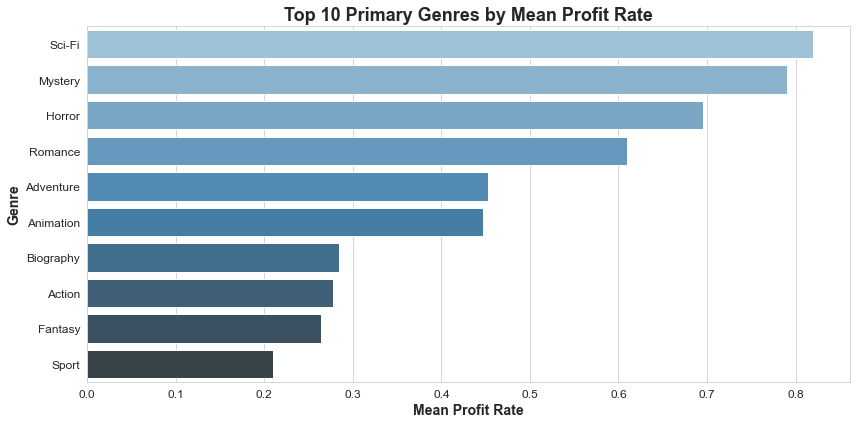

In [102]:
# Calculate mean profit by primary genre
genre_profit_rate = (
    rate_gross_budget.groupby('primary_genre')['profit_rate']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(data=genre_profit_rate, y='primary_genre', x='profit_rate', palette='Blues_d')

plt.title('Top 10 Primary Genres by Mean Profit Rate', fontsize=18, weight='bold')  # Bold and bigger title
plt.xlabel('Mean Profit Rate', fontsize=14, weight='bold')  # Bold x-axis label
plt.ylabel('Genre', fontsize=14, weight='bold')  # Bold y-axis label
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

# To save the plot as an image
# plt.savefig("Images/top_genreprofit.png", dpi = 300, bbox_inches = "tight", facecolor = "white")

plt.show()


### Top 10 genres of movies with highest ratings by audiances.  

We can observe that, **SPORT and Mystery ** represent the genre that is most loved by audiances or spectators, with a mean rating of 79% and 75% respectively.  whereas, **DRAMA and ADVANTURE** represent the nineth and tenth genres with highest rating.

That can be understood, because almost everyone loves sport, this can explain why sport ranks first in this case. We should neglect also that, among the top 10, the mean rating of each other is so close. 

In [103]:
# Top 10 most repeated primary genre of movies.
q2 = """ SELECT primary_genre, round(Avg(rating), 2) as mean_rating, round(Avg(number_votes), 2) mean_number_votes,
               round(Avg(runtime_minutes),2) mean_runtime_minutes, round(Avg(total_profit), 2) as mean_profit
               
        FROM rate_gross_budget
        GROUP BY primary_genre
        ORDER BY  mean_rating DESC
        LImit 10; """

top_10_genres_movie = pysqldf(q2)
top_10_genres_movie

,primary_genre,mean_rating,mean_number_votes,mean_runtime_minutes,mean_profit
0,Sport,7.90,77.00,114.00,5.000000e+06
1,Mystery,7.50,606341.67,118.33,1.865667e+08
2,Music,7.20,15592.00,93.00,-1.000000e+07
3,Romance,7.10,227616.00,106.00,7.770000e+07
4,Animation,7.03,121792.67,92.33,2.192000e+08
5,Biography,6.97,107271.52,117.03,6.265282e+07
6,Documentary,6.94,4230.00,80.77,6.786370e+07
7,Crime,6.61,99177.14,111.82,3.954855e+07
8,Drama,6.56,70500.86,106.71,4.848977e+07
9,Adventure,6.50,139693.57,103.75,2.151528e+08


### Top 10 studio that has created the most movies

Below, we observe that most of the movies are created by **Uni.** studio, with a total **156 movies created**, after becomes the **Fox** studio. Howerver, at the bottom of the top 10, there are Focus studio with 51 movies created.  
Moreover, we can observe that the average of profit, production budget and revenue for each of these 10 studios.

We extract these meaningfull information, so that the head of the new company's movie studio should really know the ones who are currently ruling this sector. Besides, We already observe that what kinds of opponents our studio will face up to.


In [104]:
# Top 10 of The most popular movie studio

q3 = """ SELECT studio, count('movie_id') as total_movie, round(Avg(total_profit), 2) as mean_profit,
                round(Avg(production_budget), 2) as mean_budget, round(Avg(total_revenue), 2) as mean_revenue
               
        FROM rate_gross_budget
        GROUP BY studio
        ORDER BY  total_movie DESC
        LImit 10; """

top_10_genres_movie = pysqldf(q3)
top_10_genres_movie

,studio,total_movie,mean_profit,mean_budget,mean_revenue
0,Uni.,156,1.464407e+08,5.522885e+07,2.016695e+08
1,Fox,130,1.603210e+08,6.781923e+07,2.281403e+08
2,WB,119,1.456471e+08,7.987395e+07,2.255210e+08
3,Par.,87,1.255433e+08,6.125287e+07,1.867962e+08
4,BV,86,3.365877e+08,1.320721e+08,4.686597e+08
5,Sony,81,1.641140e+08,6.689506e+07,2.310091e+08
6,LGF,69,7.486464e+07,3.406341e+07,1.089280e+08
7,FoxS,64,3.598230e+07,1.051172e+07,4.649402e+07
8,WB (NL),51,1.469569e+08,5.024706e+07,1.972039e+08
9,Focus,51,3.410839e+07,1.959804e+07,5.370643e+07


### Top 10 studio that generate the highest profit in total

To go deeper, bellow we visuliaze the studios that earned the highest profit in total. And, as we can see the top 3 of studios, **BV, Uni. and Fox**, That earned the highest profit over the movies they created, among the top 5 studios that have created most movies.


Consequently, those movies studios represents real opponents that our movie Studio will encounter in the Future.

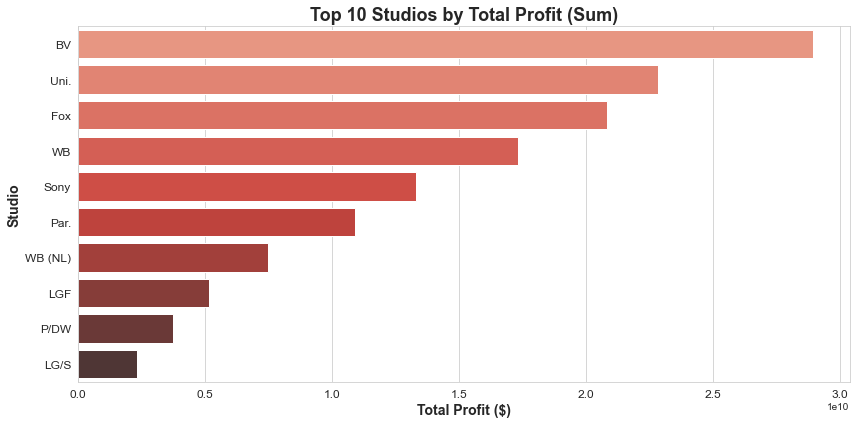

In [105]:
# Group by studio, then sum profit and sort
studio_profit = (
    rate_gross_budget.groupby('studio')['total_profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot: horizontal bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=studio_profit, y='studio', x='total_profit', palette='Reds_d')

plt.title('Top 10 Studios by Total Profit (Sum)', fontsize=18, weight='bold')  # Bold and bigger title
plt.xlabel('Total Profit ($)', fontsize=14, weight='bold')  # Bold x-axis label
plt.ylabel('Studio', fontsize=14, weight='bold')  # Bold y-axis label
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

# To save the plot as an image
# plt.savefig("Images/top_studioprofit.png", dpi = 300, bbox_inches = "tight", facecolor = "white")

plt.show()

 #  'viridis'

Below we try to analyse some distinct movies. And we can observe that, about three movies genereted a profit of 100 %. Moreover, each movie of there more than 20 movies that generated a profit over 97 %. 

In [106]:
q4 = """ SELECT title, profit_rate, total_profit, primary_genre, rating, year
        FROM rate_gross_budget  
        ORDER BY profit_rate DESC
        LIMIT 20 ; """

top_10_movie_profit_rate = pysqldf(q4)
top_10_movie_profit_rate.head(10)

,title,profit_rate,total_profit,primary_genre,rating,year
0,tiny furniture,1.00,19042000.0,Comedy,6.2,2010
1,the gallows,1.00,42900000.0,Horror,4.2,2015
2,a ghost story,1.00,20200000.0,Drama,6.8,2017
3,snitch,0.99,60750000.0,Action,6.5,2013
4,the devil inside,0.99,100800000.0,Horror,4.2,2012
5,your sisters sister,0.99,20180000.0,Comedy,6.7,2012
6,sound of my voice,0.99,18973000.0,Drama,6.6,2012
7,compliance,0.99,18749000.0,Biography,6.4,2012
8,the canyons,0.99,18506800.0,Drama,3.8,2013
9,the karate kid,0.98,351100000.0,Action,6.2,2010


### - Revenue Composition Analysis: Profit vs. Production Budget

I included this analysis to understand the composition of total movie revenues by studio, specifically how much is absorbed by production costs versus how much remains as profit.

In the movie industry, this ratio is a critical measure of financial efficiency, it shows how well studios convert their investments (budgets) into returns (profits).


### Profit vs. Production Budget among group of studios globally


#### The analysis is so clear with the pie chart bellow, 
- Mean of Profit accounts for 68.9% of the total revenue among groups of studios.

- Mean of Production budget represents 31.1% of the total revenue among groups of studios.

This means that, between each group of studio, movies created by studios in this dataset have generated more than twice the revenue beyond their initial budgets.
Such a high profit share indicates a generally profitable industry segment for studios during the period covered.  

Moreover, this indicates High Revenue Potential per dollar spent
- For every 1 dollar spent on budget, the industry is generating about 2.22 Dollars in profit on average.
- This makes the sector attractive for investors




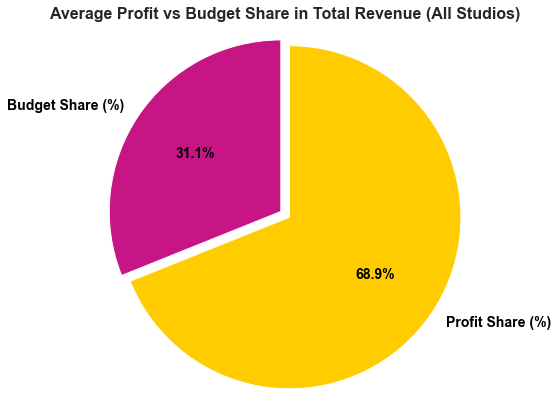

In [107]:

# Calculate average budget and profit share across all studios
budget_pct = rate_gross_budget['production_budget'].sum() / rate_gross_budget['total_revenue'].sum() * 100
profit_pct = rate_gross_budget['total_profit'].sum() / rate_gross_budget['total_revenue'].sum() * 100

# Prepare data for pie chart
labels = ['Budget Share (%)', 'Profit Share (%)']
sizes = [budget_pct, profit_pct]
colors = ['#C71585', '#ffcc00']  # Dark pink for budget, gold for profit

# Plot pie chart
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.03, 0.03),  # Slight separation between slices
    textprops={'fontsize': 14, 'weight': 'bold', 'color': 'black'}
)

# Make percentage texts bigger & bolder
for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_color('black')
    autotext.set_weight('bold')

plt.title(
    'Average Profit vs Budget Share in Total Revenue (All Studios)',
    fontsize=16,
    fontweight='bold'
)
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle

# Save the plot
# plt.savefig("Images/budgetprofit.png", dpi=300, bbox_inches="tight", facecolor="white")

plt.show()


Besides, we should considere Strategic implication for New studios :
- If your new studio can maintain a similar budget-to-revenue ratio, it will likely achieve sustainable profitability.

- However, not all studios may reach this average.

Furthermore, We should be aware This is an aggregate average, meanning : 
- some studios will have far lower profits, some higher. The 68.9% profit share doesn’t mean every studio enjoys this margin; it just means that collectively, budgets form about one-third of revenue.

### Profit vs. Production Budget by only top studios 


#### The analysis is so clear with the pie chart bellow, 
- We can see bellow, almost each of the top 10 studios that created the most movies has generated more than twice the revenue beyond their initial production budgets.  
Particularly Bv, Uni., and Fox with a profit represent about 70 % of their revenue.


This means that, movies created by the top studios have generated more than twice the revenue beyond their initial budgets.  
Such a high profit share indicates a generally profitable industry segment for top studios during the period covered.



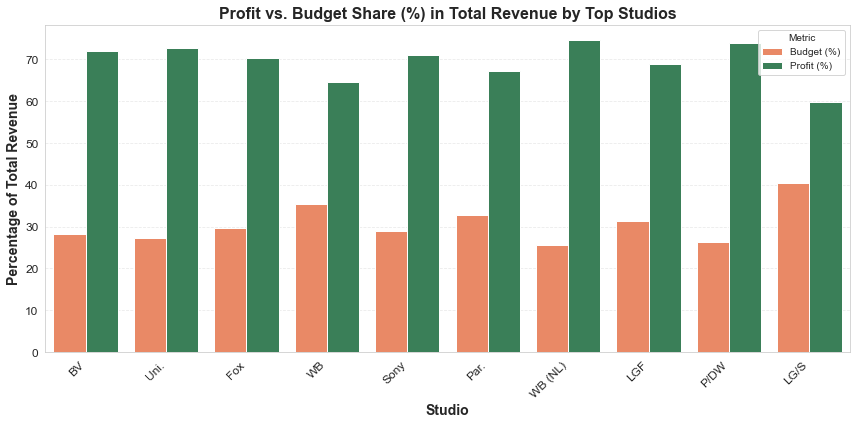

In [108]:
# Aggregate revenue, budget, and profit per studio
studio_summary = (
    rate_gross_budget
    .groupby('studio')
    .agg({
        'total_revenue': 'sum',
        'production_budget': 'sum',
        'total_profit': 'sum'
    })
    .reset_index()
)

# Calculate % share of budget and profit in total revenue
studio_summary['budget_pct'] = (studio_summary['production_budget'] / studio_summary['total_revenue']) * 100
studio_summary['profit_pct'] = (studio_summary['total_profit'] / studio_summary['total_revenue']) * 100

# Keep only top 10 studios by revenue for better visualization
top_studios_pct = studio_summary.sort_values('total_revenue', ascending=False).head(10)

# Prepare data for plotting
studio_plot_data = top_studios_pct.melt(
    id_vars='studio',
    value_vars=['budget_pct', 'profit_pct'],
    var_name='Type',
    value_name='Percentage'
)

# Beautify type labels
studio_plot_data['Type'] = studio_plot_data['Type'].map({
    'budget_pct': 'Budget (%)',
    'profit_pct': 'Profit (%)'
})

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=studio_plot_data,
    x='studio',
    y='Percentage',
    hue='Type',
    palette=['#FF7F50', '#2E8B57']  # Coral for budget, SeaGreen for profit
)

plt.title('Profit vs. Budget Share (%) in Total Revenue by Top Studios', fontsize=16, weight='bold')  # Bold title
plt.ylabel('Percentage of Total Revenue', fontsize=14, weight='bold')  # Bold y-axis
plt.xlabel('Studio', fontsize=14, weight='bold')  # Bold x-axis
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Metric', loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

# To save the plot as an image
# plt.savefig("Images/top_genre_budgetprofit.png", dpi=300, bbox_inches="tight", facecolor="white")

plt.show()


The fact that profits outweigh budgets by this margin suggests that, on average, studios have been able to leverage relatively modest production costs to achieve substantial returns.
This could indicate:

- Efficient budget allocation

- High market demand for certain films

- Strong distribution and box office performance

However, it’s worth noting that individual movie performance can vary widely, this global ratio hides the presence of flops and mega-hits.

### - Historical Trend and Seasonality Analysis

## Seasonality Check - Movie Count by Release Month

More movies tend to be released on November and December with about 150 and 155 movies released respectively.  

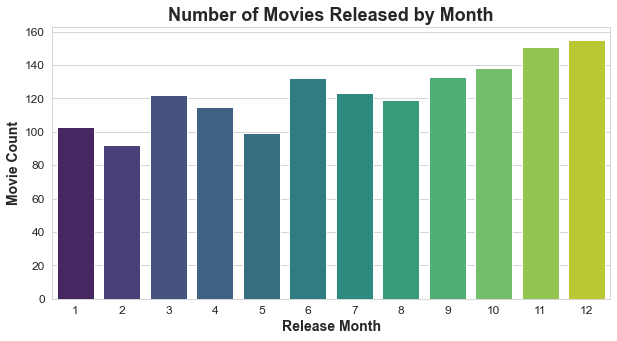

In [109]:
monthly_counts = rate_gross_budget.groupby('release_month').size().reset_index(name='movie_count')

plt.figure(figsize=(10,5))
sns.barplot(data=monthly_counts, x='release_month', y='movie_count', palette='viridis')

plt.title('Number of Movies Released by Month', fontsize=18, weight='bold')  # Bigger and bold title
plt.xlabel('Release Month', fontsize=14, weight='bold')  # Bold x-axis label
plt.ylabel('Movie Count', fontsize=14, weight='bold')   # Bold y-axis label
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# To save the plot as an image
plt.savefig("Images/moviemonth.png", dpi = 300, bbox_inches = "tight", facecolor = "white")

plt.show()


Late-year peak (October–December) likely aligns with holiday seasons, award season releases, and end-of-year marketing strategies.

Summer peaks (June–July) correspond to summer blockbusters targeting family audiences and vacation periods.

### Movie release per year

At the beginning of the 21th century, we can see that the amount of movies released had been increased considerably.  
Besides, we see a considerable growth of movies released from 2005 to 2010.

Movie production is fairly stable in the 2010–2018 period, with annual releases ranging roughly 124–188 movies.

Peak production occurred in 2011 (188 movies) and 2015–2016 (~178–179 movies).

The early years (1967–2005) show very low production, often single-digit releases, reflecting either limited data coverage or fewer movies produced historically.

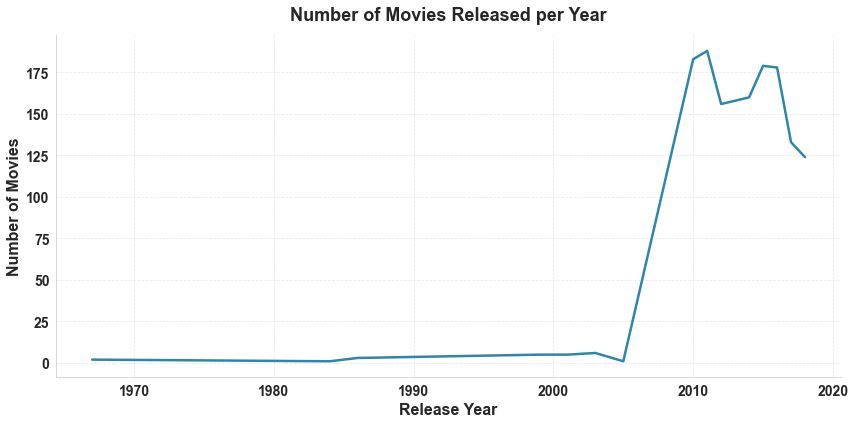

In [110]:
# Movie release per year
movie_count_per_year = (
    rate_gross_budget['release_year']
    .value_counts()
    .sort_index()
    .reset_index()
    .rename(columns={'index': 'release_year', 'release_year': 'movie_count'})
)

# Plot the chart
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.lineplot(
    data=movie_count_per_year,
    x='release_year',
    y='movie_count',
    color='#2E86AB',  # deep blue
    linewidth=2.5
)
plt.title('Number of Movies Released per Year', fontsize=18, weight='bold', pad=15)
plt.xlabel('Release Year', fontsize=16, weight='bold')
plt.ylabel('Number of Movies', fontsize=16, weight='bold')
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.4)
sns.despine()
plt.tight_layout()

# To save the plot as an image
# plt.savefig("Images/movieyear.png", dpi=300, bbox_inches="tight", facecolor="white")

plt.show()


The recent years (2010–2018) indicate consistent movie output, suggesting that the industry is mature and capable of maintaining high production volume.

The spikes in 2011, 2015, and 2016 could correspond to industry expansions or successful box office periods, incentivizing more releases.

Low releases in early years highlight historical growth — newer studios, technological advances, or better data recording contribute to the sharp increase in output over time.

##  Evolution of Revenue, Profit, and Budget trend Over the Years

As the 21th century, represent the century with more movie released. It's understandable why the profit, production budget and revenue per years increased during that century.

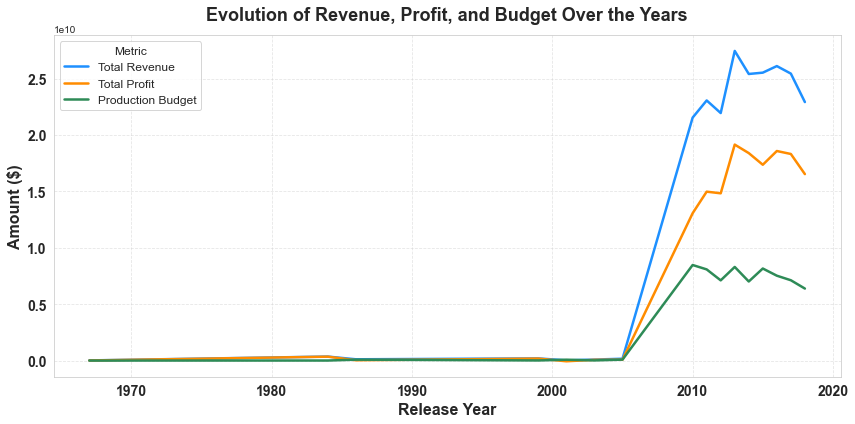

In [111]:
# Aggregate revenue, profit, and production budget by release year
yearly_finance = (
    rate_gross_budget.groupby('release_year')[['total_revenue', 'total_profit', 'production_budget']]
    .sum()
    .reset_index()
)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_finance, x='release_year', y='total_revenue', label='Total Revenue', color='dodgerblue', linewidth=2.5)
sns.lineplot(data=yearly_finance, x='release_year', y='total_profit', label='Total Profit', color='darkorange', linewidth=2.5)
sns.lineplot(data=yearly_finance, x='release_year', y='production_budget', label='Production Budget', color='seagreen', linewidth=2.5)

plt.title('Evolution of Revenue, Profit, and Budget Over the Years', fontsize=18, weight='bold', pad=15)
plt.xlabel('Release Year', fontsize=16, weight='bold')
plt.ylabel('Amount ($)', fontsize=16, weight='bold')
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Metric', fontsize=12, title_fontsize=12)
plt.tight_layout()

# To save the plot as an image
# plt.savefig("Images/profitbudgetyear.png", dpi = 300, bbox_inches = "tight", facecolor = "white")

plt.show()


High revenue and profit years (2013–2017) indicate that the industry was particularly profitable during this period, likely driven by blockbusters or franchise films.

The budget-to-revenue ratio remains relatively stable in recent years, suggesting that studios are efficiently allocating resources to generate high returns.

Slight decline in 2018 may indicate market saturation, stronger competition, or fewer mega-hits that year.

Early years’ low values again reflect historical limitations or the infancy of modern studio operations.

### 2. Diagnostic Analysis
---

This stage of the analysis investigates **why observed patterns occur** by applying statistical methods that move beyond description into explanation. Specifically, we employ two complementary approaches:

- #### Correlation Analysis  
Used to measure the strength and direction of relationships between numerical variables, such as budget, revenue, profit etc.. This helps identify which factors vary together and to what extent.

- #### Hypothesis Testing  
Applied to determine whether differences between groups, such as studios or movie genres—are **statistically significant** rather than due to random variation. This provides a more rigorous basis for comparing performance across categories.


- ### Correlation Analysis

As observed from the correlation matrix, several notable relationships emerge among the key movie metrics.

The correlation matrix highlights key relationships among movie metrics.  
- Higher production budgets tend to generate greater revenue (0.77) and moderately higher profit (0.63),  
- While total revenue and profit are almost perfectly correlated (0.98), confirming revenue drives profitability.  
- Audience engagement, measured by the number of votes, is moderately associated with both revenue (0.59) and profit (0.57), showing popular movies generally perform better financially.

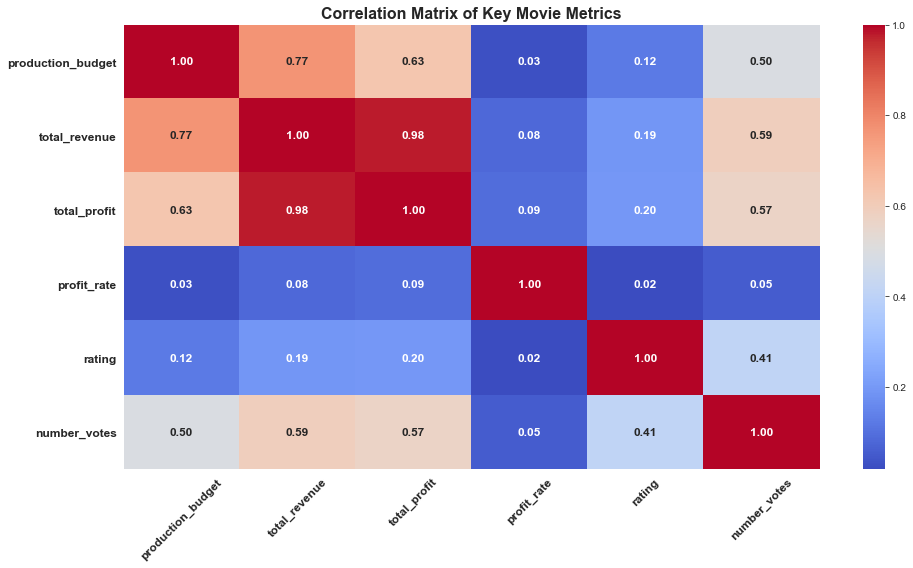

In [112]:
# Numerical columns to examine correlations
corr_vars = ['production_budget', 'total_revenue', 'total_profit', 'profit_rate', 'rating', 'number_votes']
corr = rate_gross_budget[corr_vars].corr()

plt.figure(figsize=(14,8))
sns.heatmap(
    corr, 
    annot=True,        # Show correlation values
    fmt=".2f",         # Format numbers to 2 decimal places
    cmap='coolwarm', 
    cbar=True, 
    annot_kws={"size":12, "weight":"bold"}  # Bold annotation text
)
plt.title('Correlation Matrix of Key Movie Metrics', fontsize=16, weight='bold')  # Bold title
plt.xticks(fontsize=12, weight='bold', rotation=45)
plt.yticks(fontsize=12, weight='bold', rotation=0)
plt.tight_layout()

# To save the plot as an image
# plt.savefig("Images/correlation.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

**These relationships underscore the importance of carefully allocating production budgets and engaging audiences effectively**. .   
For a new studio, targeting projects with higher potential revenue and monitoring audience response could significantly enhance profitability.

- ### Statistical Test
---

In this section, we examine whether **revenues differ significantly across genres or studios**.  

To address this, we apply an **ANOVA (Analysis of Variance) test**, which allows us to determine if the differences in mean values between groups are statistically significant. Specifically, we conduct:

1. **Genre-Level Analysis**: Testing whether the average total revenue differs among the top 10 movie genres.  
2. **Studio-Level Analysis**: Testing whether the average total profit differs among the top 10 movie studios.  


### Context and Objective
Our goal is to determine whether there are statistically significant differences in the average total revenue among the top 10 movie genres and in the average total profit among the top 10 movie studios.

Why do this?
Understanding if certain genres or studios systematically perform better financially is crucial for guiding the new movie studio’s strategic focus.

### 1. Genre-Level Analysis :  
- ### Testing whether the average total revenue differs among the top 10 movie genres.  


- ### Hypotheses :

Null Hypothesis (H₀): All top 10 genres generate the same revenue in everage.

Alternative Hypothesis (H₁): At least one genre’s mean total revenue differs from the others.

We performe an ANOVA test in the cell bellow, and our **Decision** will base on the P-Value.

If the p_value is greater than our significance level, in this case 5 %,   
we fail to reject the null Hypothesis, meaning no statistically significant difference in means is detected.  
Otherwise, We reject the null Hypothesis, that means there is enough evidence that at least one group mean differs significantly.

- ### Performing the test :

---

In [113]:
# Get top 10 genres by count of movies
top_10_genres = rate_gross_budget['primary_genre'].value_counts().head(10).index.tolist()

# Filter dataset for top 10 genres only
top_genres_data = rate_gross_budget[rate_gross_budget['primary_genre'].isin(top_10_genres)]

# Prepare revenue lists by genre for ANOVA
revenue_by_genre_top10 = [group['total_revenue'].values for name, group in top_genres_data.groupby('primary_genre')]

# ANOVA for total revenue by top 10 genres
f_stat_genre, p_value_genre = stats.f_oneway(*revenue_by_genre_top10)
print(f"ANOVA test for Total Revenue by Top 10 Genres: F = {f_stat_genre:.3f}, p = {p_value_genre:.3e}")


ANOVA test for Total Revenue by Top 10 Genres: F = 32.749, p = 9.581e-53


- ### Results and Analysis :

The very large F-statistic indicates that the variation between the genre group means is much greater than the variation within each genre group.

The extremely small p-value, far below the typical 0.05 significance level, means we have overwhelming statistical evidence to reject the null hypothesis.

***That means we conclude that mean revenue of all the top 10 genres is not the same.***

- ### Business Implication:  

There is a statistically significant difference in the average total revenue generated by different genres.  
This confirms that not all movie genres are equally profitable at the box office.

- This finding is valuable for the new movie studio because:

- They should focus their production on genres that historically generate higher revenues to maximize financial success.

- Conversely, some genres might be less lucrative or more niche and may require more careful budgeting or marketing strategies.

### 2. Studio-Level Analysis :  
- ### Testing whether the average total profit differs among the top 10 movie studios.  


- ### Hypotheses :  

Null Hypothesis (H₀): All top 10 studios have the same mean total profit.

Alternative Hypothesis (H₁): At least one studio’s mean total profit is different from the others.

We performe an ANOVA test in the cell bellow, and our Decision will base on the P-Value.  
If the p_value is greater than the significance level of 5%, we fail to reject the null Hypothesis.  
Otherwise, We reject the null Hypothesis

- ### Performing the test

---

In [114]:
# Get top 10 studios by count of movies
top_10_studios = rate_gross_budget['studio'].value_counts().head(10).index.tolist()

# Filter dataset for top 10 studios only
top_studios_data = rate_gross_budget[rate_gross_budget['studio'].isin(top_10_studios)]

# Prepare total_profit lists by studio for ANOVA
profit_by_studio_top10 = [group['total_profit'].values for name, group in top_studios_data.groupby('studio')]

# ANOVA for total profit by top 10 studios
f_stat_studio, p_value_studio = stats.f_oneway(*profit_by_studio_top10)

print(f"ANOVA test for Total Profit by Top 10 Studios: F = {f_stat_studio:.3f}, p = {p_value_studio:.3e}")

ANOVA test for Total Profit by Top 10 Studios: F = 14.544, p = 4.028e-22


- ### Results and Analysis :  

We can observe that, The F-statistic of 14.544 indicates that the variance of total profits between  
studios is significantly larger than the variance within each studio group.

The p-value is far below the conventional threshold of 0.05, allowing us to reject the null hypothesis with very strong confidence. 

***That means we conclude that mean profit of all the top 10 studios is not the same.***

- ### Business Implication:

There is clear statistical evidence that average total profit varies significantly between the top studios.  
This means that some studios consistently generate higher profits than others, which is a critical insight for:

- The new movie studio to study and possibly emulate the practices of higher-profit studios.

- Making decisions about potential partnerships, investments, or strategic hires based on studio performance.

- Allocating resources efficiently by understanding studio-level factors affecting profitability.

## Results  

---
In this section, we summarize the key findings from our **descriptive and diagnostic analyse**s.   
The results reveal patterns in revenue, profit, and audience engagement across genres, studios, and release periods. They show which types of movies and studios have historically performed best, how production budgets impact profitability, and seasonal trends in releases.

### 1. Performance Ranking

- **Top Studios** : **BV, Uni., and Fox** are the studios generating the highest total profits among all studios. They are also among the top five studios in terms of movie production volume.  


- **Production Volume** : **Uni. produced the highest number of movies (156 films), followed by Fox (130 films).**  


- **Top Genres by Profit Rate** : **SCI-FI and MYSTERY** have the highest mean profit rates, around 80%, while ACTION, despite being the most frequent genre, achieves only about 30% mean profit rate.  


- **Most Common Genres** : **Action and Drama dominate in number of movies, with 409 and 302 films, respectively.**  

- **Audience Preference** : **Sport and Mystery genres have the highest mean ratings, 79% and 75%, suggesting strong audience appreciation.**


### 2. Revenue Composition Analysis

- **On average, 31.1% of total revenue is allocated to production budgets, while 68.9% constitutes profit**. This indicates high profitability margins, with movies generating more than twice their budget in revenue on average.  


- **Top studios such as BV, Uni., and Fox achieve even higher margins, with profits representing about 70% of their revenue**.
These findings highlight the efficiency and strong return potential within the industry for successful studios.

### 3. Historical Trend and Seasonality Analysis

- **Seasonality** : The industry exhibits strong seasonality, with the majority of films released in **November–December and June–July, capturing peak audience attendance periods.** Fewer releases occur in January, February, and May, highlighting slower months in terms of movie activity.  


- **Movies Released per Year** : **Between 2010 and 2018**, the number of movies released per year is consistently high, ranging from **124 to 188 films**, showing a mature and productive industry.


- **Budget, Profit, and Revenue Trends by Year** :  Total revenue and profit follow a similar trend, peaking in **2016–2017**, suggesting highly profitable periods driven by successful releases.  Total production budget is relatively stable over recent years, indicating efficient allocation of resources across movies.

### 4. Diagnostic Findings:

-  The analysis reveals that **Higher production budgets are associated with greater total revenue and moderately higher profits**. This indicates that investing in quality production tends to enhance financial outcomes for films.   


- **Total revenue and profit are almost perfectly correlated, confirming that revenue is the primary driver of profitability**. Furthermore, audience engagement, measured by the number of votes, shows a moderate positive relationship with both revenue and profit, emphasizing the financial impact of popular, well-received films.   


- **Revenue Differences by Genre :** **An ANOVA test across the top 10 movie genres shows a highly significant difference in total revenue** (F = 32.75, p < 0.001).  This confirms that some genres consistently generate higher box office revenue than others.  


- **Profit Differences by Studio**: **An ANOVA test across the top 10 studios shows a significant difference in total profit (F = 14.54, p < 0.001).** This indicates that Some studios consistently achieve higher profits, reflecting effective strategies in production, marketing, and audience targeting.  


- **Both genre and studio identity are statistically significant factors influencing revenue and profit.**




## Business Recommendation 1

- ### Focus production on high-revenue genres 

---

Analysis shows that total revenue differs significantly by genre, **with SCI-FI, MYSTERY, Horror and Romance** generating the highest profit rates, whereas **Action And Drama** despite being the most frequently produced genres have a much lower average profit rate. 

- **Focus production on high-revenue** :  

**High-revenue genres should be prioritized to maximize box office performance**, Because Prioritizing these genres increases the likelihood of strong box office performance while reducing financial risk.  
While less profitable genres can still be considered selectively, using smaller budgets or targeted marketing to manage financial risk.

## Business Recommendation 2

- ### Learn from Industry Leaders and Pursue Strategic Partnerships.

---

- **Learn from Industry Leaders** : 

Analysis of total profit across studios shows significant differences, with studios like **BV, Uni., and Fox** consistently generating higher profits. The new studio should study the strategies of these top-performing studios and prioritize resource allocation,such as production budget, marketing, and talent toward projects and practices that have historically driven strong profitability.

- **Pursue Strategic Partnerships** : 

At the same time, the new studio must be cautious because it will face established competitors that dominate the market. Exploring partnerships or co-productions with top studios can help gain market insight, share risk, and accelerate credibility, while still focusing on high-potential projects.  
This balanced approach increases the likelihood of success while navigating a highly competitive industry.

## Business Recommendation 3

- ### Maximize Profitability Through Efficient Budget Planning
---

Analysis shows that, on average, **only 31.1% of total revenue is allocated to production budgets, while 68.9% constitutes profit**, highlighting that the movie sector is highly profitable overall.   

The new studio should carefully plan budgets to ensure spending is efficient, prioritizing projects where expected profits significantly exceed production costs. This strategy leverages the sector’s inherent profitability to maintain high margins while minimizing financial risk on individual films.

## Conclusion

---

**This exploratory analysis provides a comprehensive view of the movie industry’s performance, trends, and profitability patterns, offering actionable insights for the new studio.**

**Key findings indicate that :**


- **Genre selection drives profitability** :  **SCI-FI, MYSTERY and Horror** genres generate the highest revenue and profit rates, while frequently produced genres like **Action** show lower profit efficiency. Prioritizing high-revenue genres while managing lower-profit genres strategically can maximize financial returns.  


- **Studio performance varies significantly** : **Top-performing studios such as BV, Uni., and Fox consistently achieve higher profits**, highlighting the importance of learning from their practices. Entering this competitive market requires careful resource allocation, strategic planning, and potential partnerships with established studios to mitigate risk.


- **Timing and seasonality matter** : Movie releases peak in November, December, and summer months, suggesting that scheduling key releases during these periods can optimize audience engagement and box office revenue.  


- **The sector is inherently profitable** : On average, only about **31% of revenue is spent on production budgets while 69% represents profit**, indicating high industry margins. This underscores the potential for strong returns if projects are carefully planned and budgets efficiently managed.


**Overall, the analysis demonstrates that the new movie studio can achieve success by combining data-driven genre selection, strategic resource allocation, optimized budgeting, and seasonal timing. By leveraging these insights, the studio is positioned to enter a competitive industry intelligently, maximize profitability, and make informed decisions that reduce risk while capitalizing on market opportunities.**

### Next Steps

---

- **Monitor and update performance data** : Continuously track box office revenue, profit, and audience ratings for released movies to validate trends by genre and studio performance.

- **Implement predictive modeling** : Develop forecasting models for revenue and profit using genre, studio, production budget, and seasonal patterns to guide future production decisions.

- **Strategic partnerships and collaborations** : Explore co-productions or alliances with top-performing studios (BV, Uni., Fox) to leverage industry expertise and reduce market entry risks.

- **Optimize release scheduling and marketing** : Plan movie releases around peak months (November, December, summer) and tailor marketing campaigns to maximize audience reach and revenue.

- **Test and diversify genre portfolio** : While prioritizing high-profit genres (SCI-FI, MYSTERY), selectively explore less profitable but popular genres like ACTION with smaller budgets or targeted marketing to manage risk.

- **Track key performance metrics** : Establish KPIs for revenue, profit rate, and audience engagement to assess the impact of decisions, optimize resource allocation, and adjust strategies over time.